In [2]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [5]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [7]:
df_raw = pd.read_csv("C:/청년AI.BigData아카데미/data/보험료.CSV", encoding = 'euc-kr')
df_raw.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [8]:
df_raw.isnull().sum()
df_raw = df_raw.drop(['가입유형', '납부유형', '고객번호'], axis=1)
df_raw.head()
df_raw = pd.get_dummies(df_raw, columns=['성별'], drop_first=True)
df_raw.head()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성
0,19,27.9,0,1,19,40,168849,0
1,18,33.8,1,0,10,40,17255,1
2,28,33.0,3,0,12,30,44494,1
3,33,22.7,0,0,15,30,219844,1
4,32,28.9,0,0,9,30,38668,1


In [9]:
df_raw.isnull().sum()

나이       0
BMI      0
자녀수      0
흡연여부     0
보장범위     0
납입기간     0
보험료      0
성별_여성    0
dtype: int64

In [12]:
# train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

# 목표 변수와 설명 변수 분리
df_train_x = df_train.drop("보험료", axis=1)
df_train_y = df_train["보험료"]

df_test_x = df_test.drop("보험료", axis=1)
df_test_y = df_test["보험료"]

# 데이터 크기 확인
print("Train X shape:", df_train_x.shape)
print("Train Y shape:", df_train_y.shape)
print("Test X shape:", df_test_x.shape)
print("Test Y shape:", df_test_y.shape)

rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

train data size : (940, 8)
test data size : (403, 8)
Train X shape: (940, 7)
Train Y shape: (940,)
Test X shape: (403, 7)
Test Y shape: (403,)
Score on training set: 0.997
Score on test set: 0.963


In [14]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [16]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [18]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.996,0.965
1,20,0.997,0.964
2,30,0.997,0.964
3,40,0.997,0.963
4,50,0.997,0.963
5,60,0.997,0.963
6,70,0.997,0.963
7,80,0.997,0.963
8,90,0.997,0.963
9,100,0.997,0.963


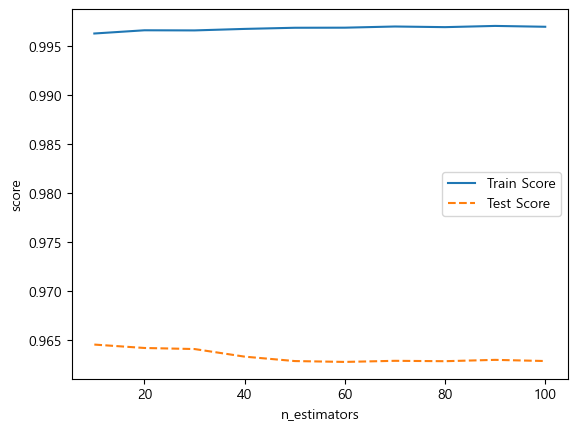

In [20]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [23]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 30,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.997,0.964
1,2,0.993,0.966
2,3,0.990,0.968
3,4,0.987,0.966
4,5,0.984,0.962
5,6,0.982,0.962
6,7,0.981,0.962
7,8,0.979,0.960
8,9,0.977,0.959
9,10,0.976,0.958


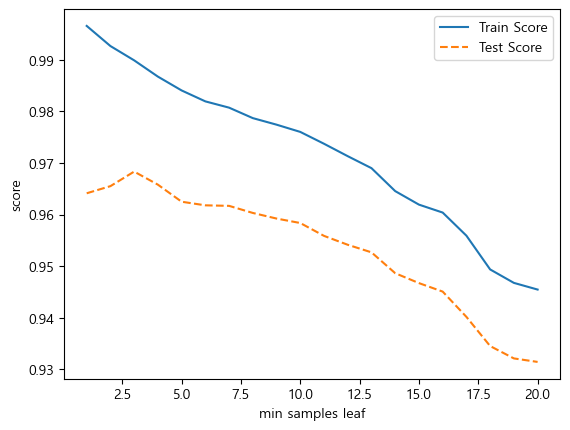

In [25]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [26]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 3,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.990,0.968
1,6,0.990,0.968
2,8,0.989,0.968
3,10,0.988,0.968
4,12,0.986,0.968
5,14,0.985,0.967
6,16,0.983,0.965
7,18,0.982,0.964
8,20,0.981,0.964
9,22,0.979,0.962


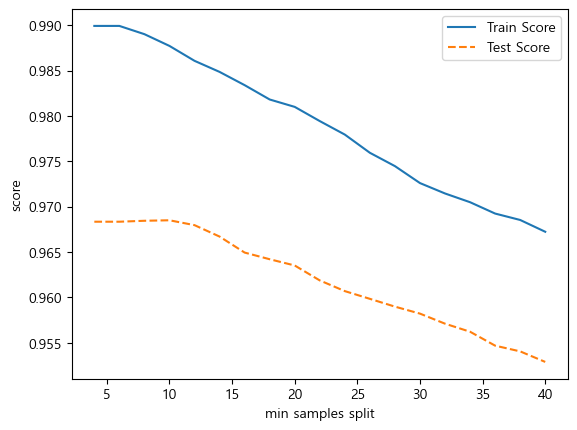

In [28]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [29]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 30,
                               min_samples_leaf = 3, min_samples_split = 12,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.633,0.587
1,2,0.853,0.832
2,3,0.929,0.913
3,4,0.966,0.950
4,5,0.982,0.964
5,6,0.985,0.967
6,7,0.986,0.968
7,8,0.986,0.968
8,9,0.986,0.968
9,10,0.986,0.968


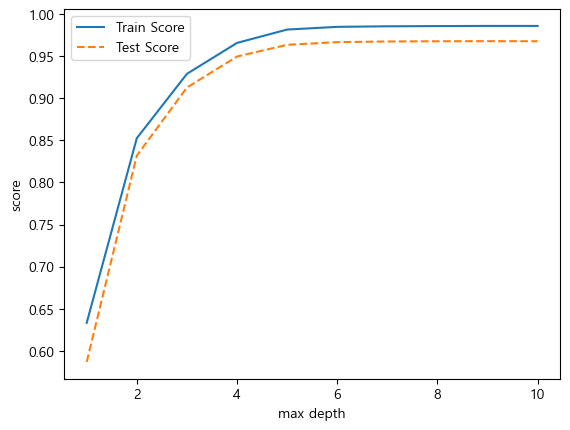

In [31]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [50]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 3,
                                 min_samples_split = 12, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.966
Score on test set: 0.950


In [51]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [469031.87657629 417890.16912911  27166.90286202  45849.76315781
  85927.03738967  74015.61152769 133399.36329354  79887.18695985
 221592.41183223 463339.76629953]


In [52]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

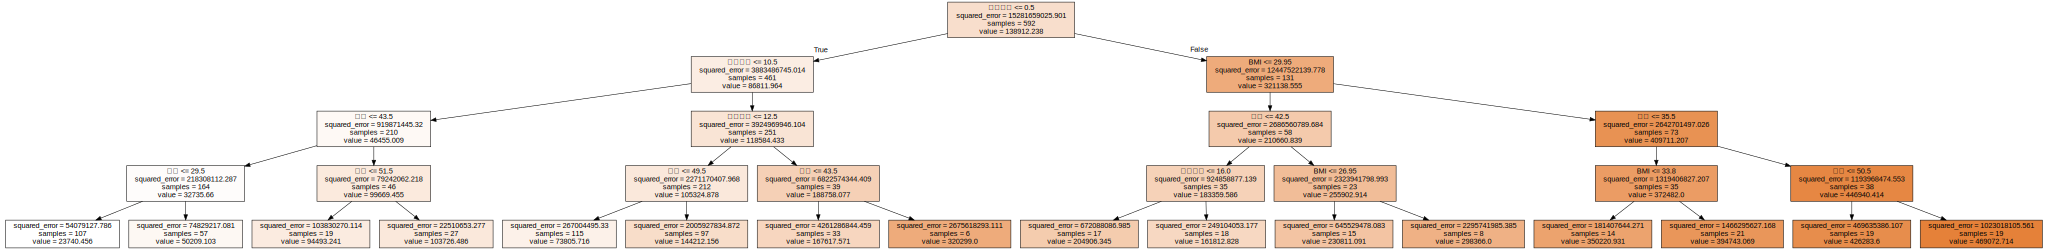

In [53]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리 저장
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", 
                feature_names=v_feature_name, impurity=True, filled=True)

# 'utf-8' 인코딩으로 .dot 파일 열기
with open("rfr_final_0.dot", encoding="utf-8") as f:
    dot_graph = f.read()

# Graphviz를 사용하여 트리 시각화
display(graphviz.Source(dot_graph))


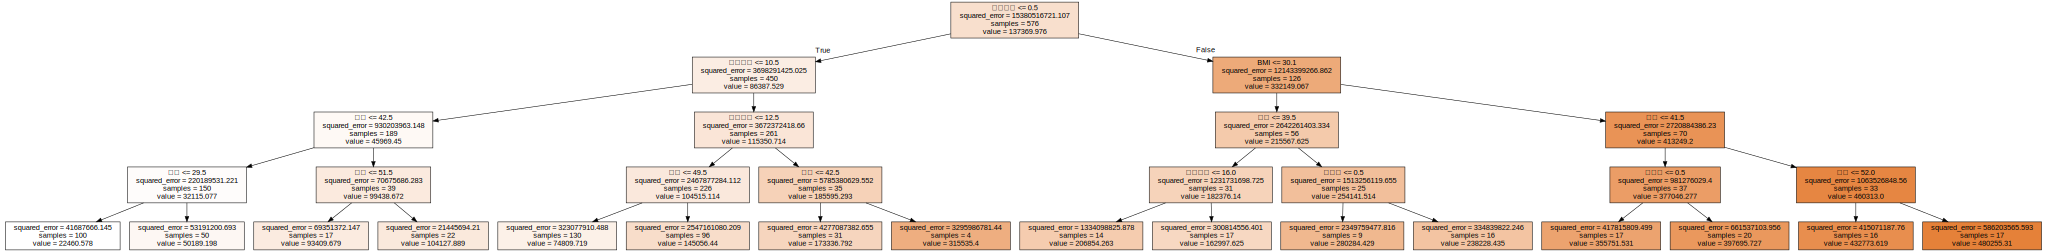

In [54]:
# 1번 트리 저장
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", 
                feature_names=v_feature_name, impurity=True, filled=True)

# 'utf-8' 인코딩으로 .dot 파일 열기
with open("rfr_final_1.dot", encoding="utf-8") as f:
    dot_graph = f.read()

# Graphviz를 사용하여 트리 시각화
display(graphviz.Source(dot_graph))


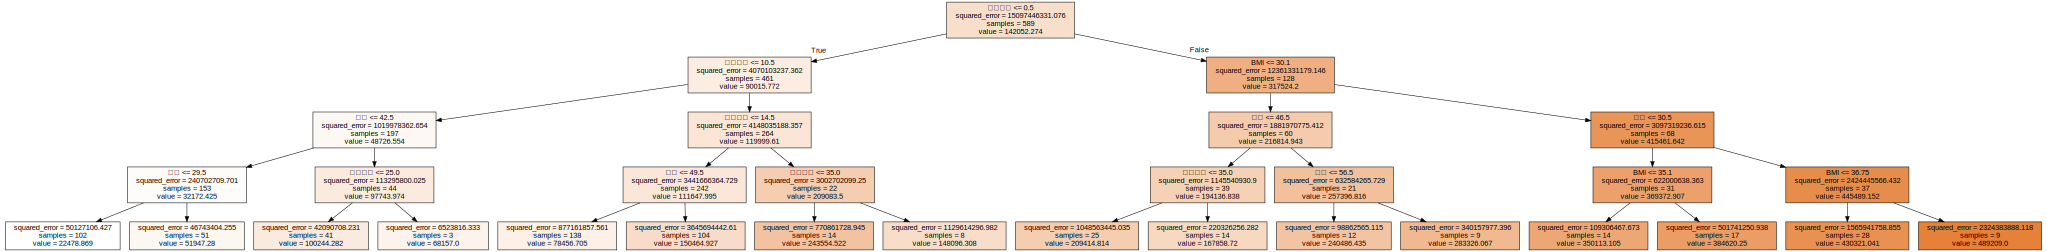

In [55]:
# 10번 트리 저장
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", 
                feature_names=v_feature_name, impurity=True, filled=True)

# 'utf-8' 인코딩으로 .dot 파일 열기
with open("rfr_final_10.dot", encoding="utf-8") as f:
    dot_graph = f.read()

# Graphviz를 사용하여 트리 시각화
display(graphviz.Source(dot_graph))


In [56]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,흡연여부,0.662
1,BMI,0.148
4,보장범위,0.096
0,나이,0.081
5,납입기간,0.012
2,자녀수,0.001
6,성별_여성,0.000


Text(0, 0.5, '변수')

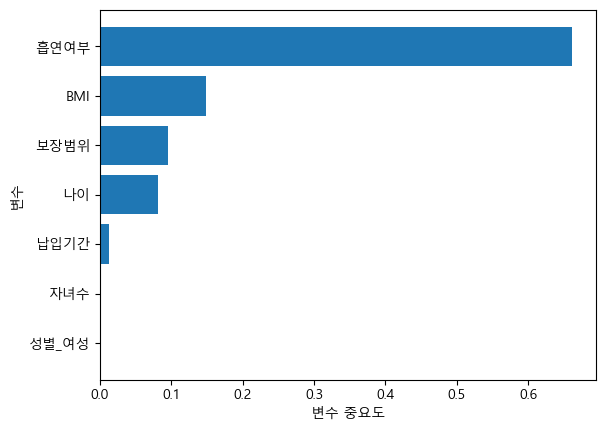

In [57]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [49]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=9, min_samples_split=4, random_state=1234)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score: 
0.976


# 결론
GridSearchCV를 사용해서 랜덤포레스트(Random Forest) 모델의 최적 하이퍼파라미터를 찾은 결과, 가장 좋은 하이퍼파라미터 조합은 max_depth=9, min_samples_leaf=1, min_samples_split=4로 결정되었다.

이 모델은 훈련 데이터에서 R² 값 0.966을, 테스트 데이터에서 R² 값 0.950을 기록하며 높은 설명력을 보였다. 그래서 보험료 예측에서 매우 잘 작동했다고 할 수 있다. 이 모델은 과적합을 방지하면서도 안정적으로 테스트 데이터에서 좋은 성능을 보여줬다.

변수 중요도를 분석한 결과, 흡연여부가 가장 중요한 변수로 작용했다고 나왔다. 그 다음으로는 BMI와 보장범위가 중요한 변수로 확인되었다. 반면에 성별과 자녀수는 모델의 예측에 거의 영향을 미치지 않았다. 이는 흡연 여부와 BMI가 보험료에 큰 영향을 미친다는 것을 의미한다.

결론적으로, 보험료 예측에서 가장 중요한 것은 모델의 정확도였다. 그래서 최적화된 랜덤포레스트 모델을 유지하는 것이 좋겠다고 판단되었다. 이 모델은 중요한 변수들을 잘 반영하고 있으며, 높은 예측 성능을 보였다. 그러나 모델을 더 잘 해석하고 과적합을 방지하려면 변수 선택을 좀 더 최적화하거나, 다른 모델들(XGBoost, Decision Tree 등)과 비교해서 더 나은 성능을 낼 수 있는 방법을 고려하는 것이 좋을 것이다. 트리 기반 모델은 변수 간 상호작용을 잘 처리하지만, 모델이 너무 복잡해지지 않도록 변수 중요도를 참고해서 불필요한 변수는 제거하는 것도 한 방법이 될 수 있다.